# Calculate AUROC

In [ ]:
import pandas as pd
from sklearn.metrics import roc_auc_score

data = pd.read_csv("/gpfs/home/pl2948/VariantInterpretation/Data/all_scores_final.csv")

tools = ['PhyloP', 'evo2','ag_q', 'rule_pred','GPN_MSA', 'PhyloGPN', 'nt_l2', 'db2_l2',
         'ESM1b_score', 'ESM1v-1_score', 'ESM2_score', 'am_score',
         'pai_score'
        ]

subgroups = ['group: coding', 'group: missense', "group: missense + 3'UTR", 'group: missense + intron (non-splice)',
             'group: stop gain', 'group: start loss',
             'group: noncoding', 'group: stop loss', 'group: synonymous',
             "group: 5'UTR", "group: 3'UTR", "group: 3'UTR + RNA gene",
             "group: splice", "group: intron (non-splice)", "group: RNA gene"]

results = {group: {} for group in ['Overall'] + subgroups}

for idx, tool in enumerate(tools):
    if idx >= 8:
        results['Overall'][tool] = ""
        continue
    subset = data[data[tools[:6]].notna().all(axis=1)]
    if subset["ClinVar_label"].nunique() < 2:
        results['Overall'][tool] = ""
    else:
        score = roc_auc_score(subset["ClinVar_label"], subset[tool])
        if tool not in ['PhyloP', 'nt_l2','PhyloGPN',"rule_pred"]: score = 1 - score
        results['Overall'][tool] = round(score, 4)

results['Overall']['#Variants'] = len(subset)

n_positive_overall = subset["ClinVar_label"].sum() if len(subset) > 0 else 0

results['Overall']['p%'] = round(100 * n_positive_overall / len(subset), 2) if len(subset) > 0 else ""

for idx, subgroup in enumerate(subgroups):
    plm_flag = idx in [1, 2, 3]
    plm_noampai_flag = idx in [4]
    plm_noampai_flag_1 = idx in [5]
    if plm_flag:
        subset = data[(data[tools].notna().all(axis=1)) & (data[subgroup] == 1)]
        tool_list = tools.copy()
    elif plm_noampai_flag:
        subset = data[(data[tools[:12]].notna().all(axis=1)) & (data[subgroup] == 1)]
        tool_list = tools[:12].copy()
    elif plm_noampai_flag_1:
        subset = data[(data[tools[:11]].notna().all(axis=1)) & (data[subgroup] == 1)]
        tool_list = tools[:11].copy()
    else:
        subset = data[(data[tools[:8]].notna().all(axis=1)) & (data[subgroup] == 1)]
        tool_list = tools[:8].copy()
    results[subgroup]['#Variants'] = len(subset)
    total_variants = (data[subgroup] == 1).sum()
    n_positive = subset["ClinVar_label"].sum() if len(subset) > 0 else 0
    results[subgroup]['p%'] = round(100 * n_positive / total_variants, 2) if total_variants > 0 else ""
    for tool in tools:
        if tool not in tool_list:
            results[subgroup][tool] = ""
            continue
        if len(subset) == 0 or subset["ClinVar_label"].nunique() < 2:
            results[subgroup][tool] = ""
            continue
        score = roc_auc_score(subset["ClinVar_label"], subset[tool])
        if tool not in ['PhyloP', 'PhyloGPN','db2_l2','nt_l2', 'am_score', 'pai_score','ag_q','rule_pred']: score = 1 - score
        results[subgroup][tool] = round(score, 4)
df_result = pd.DataFrame(results)

stop_gain_df = data[data['group: stop gain'] == 1]
stop_gain_df = stop_gain_df.dropna(subset=['pai_score'])
print("Number of variants in stop gain with PAI-3D scores:", len(stop_gain_df))
auc_value = roc_auc_score(stop_gain_df['ClinVar_label'], stop_gain_df['pai_score'])
df_result.iloc[12, 5] = auc_value
print("pai_score 在 group: stop gain 的 AUC:", auc_value)
display(df_result)
df_result.to_csv("result_v7.csv")

Number of variants in stop gain with PAI-3D scores: 19795
pai_score 在 group: stop gain 的 AUC: 0.8171152457986333


,Overall,group: coding,group: missense,group: missense + 3'UTR,group: missense + intron (non-splice),group: stop gain,group: start loss,group: noncoding,group: stop loss,group: synonymous,group: 5'UTR,group: 3'UTR,group: 3'UTR + RNA gene,group: splice,group: intron (non-splice),group: RNA gene
PhyloP,0.9079,0.8396,0.8562,0.8530,0.8680,0.7038,0.6748,0.9762,0.7964,0.8552,0.6959,0.8621,0.9323,0.7273,0.8518,0.882
evo2,0.9693,0.9459,0.8363,0.8960,0.8352,0.6631,0.7106,0.9754,0.8255,0.8852,0.7671,0.7474,0.6354,0.6967,0.9035,0.4585
ag_q,0.3097,0.5947,0.5596,0.5083,0.5834,0.3887,0.5228,0.9906,0.3622,0.919,0.5795,0.7891,0.513,0.5923,0.9598,0.8511
rule_pred,0.962,0.9228,0.5000,0.5000,0.5000,0.5,0.5,0.9442,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
GPN_MSA,0.96,0.9269,0.9065,0.8873,0.8960,0.7826,0.7689,0.9813,0.8876,0.8821,0.7277,0.908,0.9583,0.7749,0.8848,0.9384
PhyloGPN,0.0846,0.1334,0.2013,0.2709,0.3113,0.3233,0.4174,0.0494,0.305,0.1938,0.3988,0.2354,0.3229,0.2781,0.1543,0.5237
nt_l2,0.793,0.8067,0.5943,0.5456,0.6641,0.6182,0.569,0.8507,0.6087,0.7696,0.5674,0.5636,0.5573,0.6172,0.7502,0.3708
db2_l2,0.5755,0.4342,0.4845,0.5456,0.4487,0.4831,0.3886,0.4334,0.5695,0.5525,0.4137,0.4994,0.6042,0.4542,0.4369,0.4227
ESM1b_score,,,0.9193,0.9059,0.7999,0.7884,0.6809,,,,,,,,,
ESM1v-1_score,,,0.8856,0.8697,0.7689,0.6562,0.6381,,,,,,,,,


# Plot figure 1

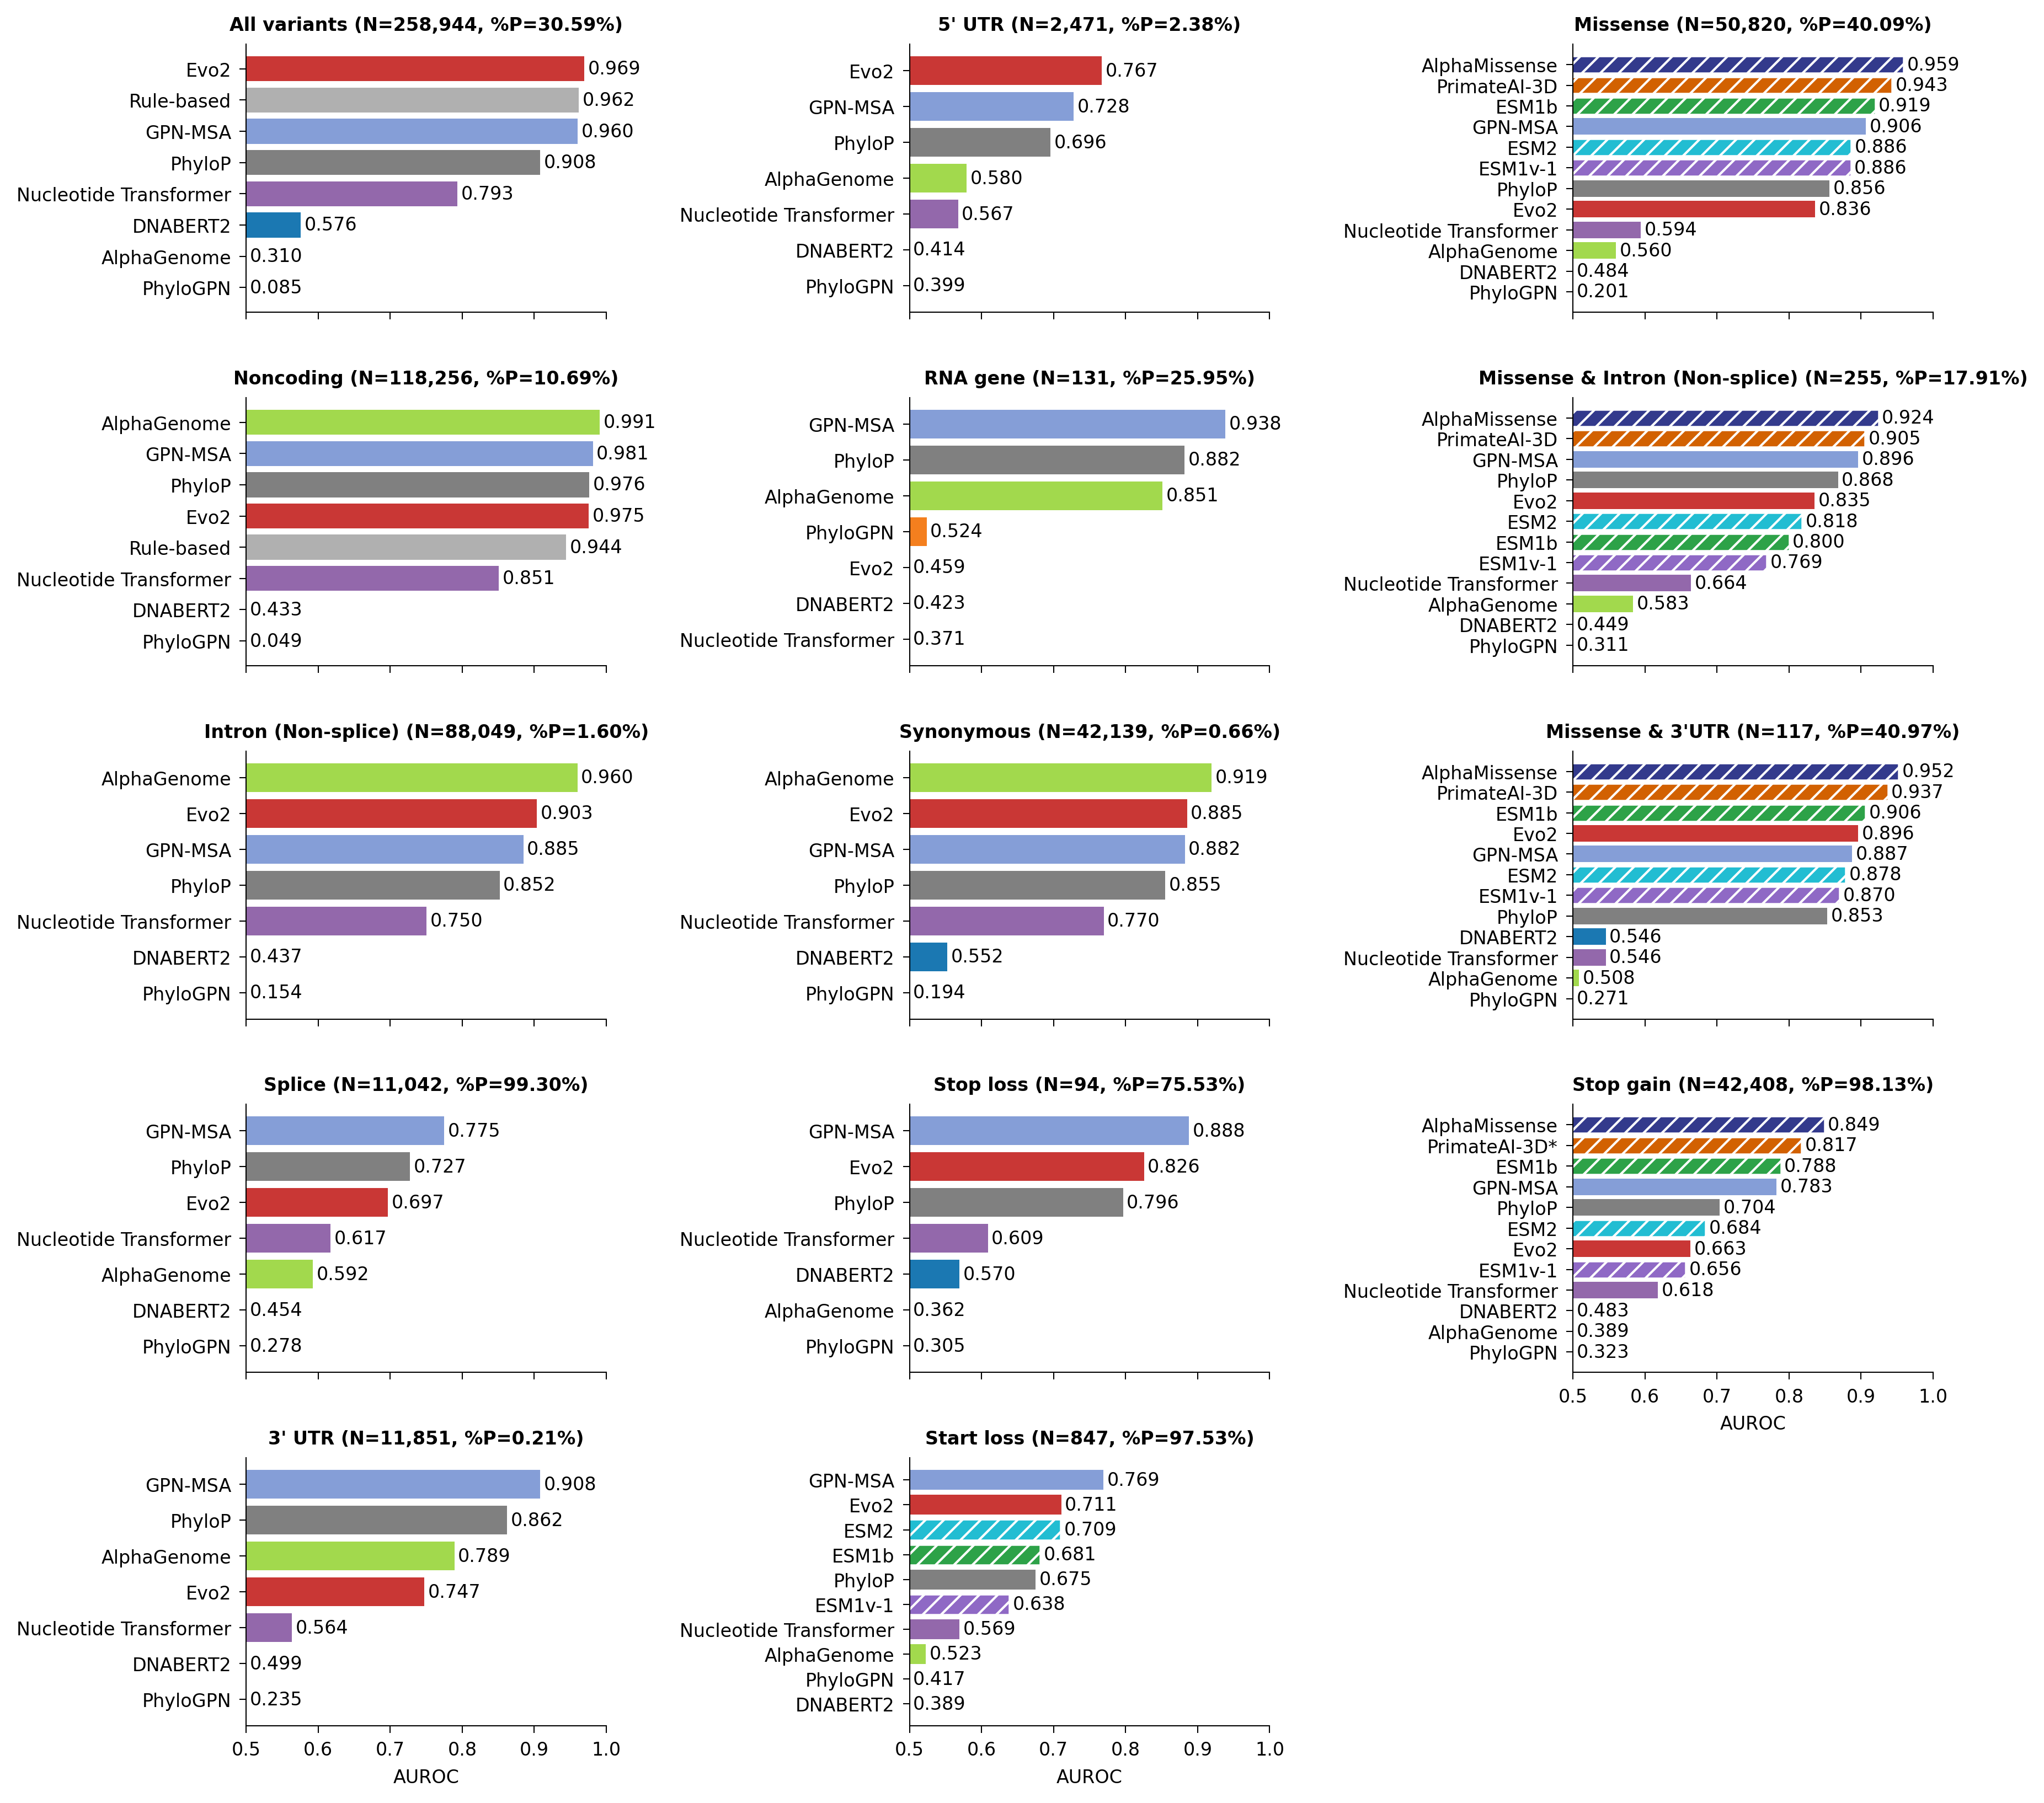

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pathlib import Path
from collections import defaultdict

# ===================== Global style =====================
FONT_SIZE = 8
FONT_NAME = 'DejaVu Sans' 

SAVE_BIG = True

# ===================== Load data =====================
df = pd.read_csv("result_v7.csv")

rename_dict = {
    "evo2": "Evo2", "db2_l2": "DNABERT2", "nt_l2": "Nucleotide Transformer",
    "PhyloP": "PhyloP", "ag_q": "AlphaGenome", "GPN_MSA": "GPN-MSA",
    "PhyloGPN": "PhyloGPN", "ESM1b_score": "ESM1b", "ESM1v-1_score": "ESM1v-1",
    "ESM2_score": "ESM2", "pai_score": "PrimateAI-3D",
    "am_score": "AlphaMissense", "rule_pred": "Rule-based",
}
df = df.rename(columns=rename_dict)
df["Unnamed: 0"] = df["Unnamed: 0"].replace(rename_dict)

palette = {
    "Evo2": "#c93735", "DNABERT2": "#1b78b2", "Nucleotide Transformer": "#9368ab",
    "PhyloP": "#808080", "GPN-MSA": "#859ed7", "PhyloGPN": "#f47f1e",
    "AlphaGenome": "#a2d94d", "ESM1b": "#2da248", "ESM1v-1": "#8f69c5",
    "ESM2": "#22bdd2", "PrimateAI-3D": "#d26101", "AlphaMissense": "#333a8c",
    "Rule-based": "#b0b0b0",
}
dashed_models = ["ESM1b", "ESM1v-1", "ESM2", "AlphaMissense", "PrimateAI-3D"]

model_rows = df["Unnamed: 0"].tolist()[:-2]
df_models = df[df["Unnamed: 0"].isin(model_rows)].set_index("Unnamed: 0")
n_row = df[df["Unnamed: 0"] == "#Variants"].iloc[0]
p_row = df[df["Unnamed: 0"] == "p%"].iloc[0]

# 显示名映射
display_map = {
    "Overall": "All variants", "group: noncoding": "Noncoding",
    "group: intron (non-splice)": "Intron (Non-splice)",
    "group: splice": "Splice", "group: 5'UTR": "5' UTR",
    "group: 3'UTR": "3' UTR", "group: RNA gene": "RNA gene",
    "group: synonymous": "Synonymous", "group: start loss": "Start loss",
    "group: stop loss": "Stop loss", "group: missense": "Missense",
    "group: missense + intron (non-splice)": "Missense & Intron (Non-splice)",
    "group: missense + 3'UTR": "Missense & 3'UTR", "group: stop gain": "Stop gain",
}
ordered_display_names = [
    "All variants", "Noncoding", "Intron (Non-splice)", "Splice", "3' UTR", "5' UTR",
    "RNA gene", "Synonymous", "Stop loss","Start loss", 
    "Missense", "Missense & Intron (Non-splice)", "Missense & 3'UTR", "Stop gain"
]
reverse_display_map = {v: k for k, v in display_map.items()}

group_values = defaultdict(list)
for raw_k, disp_k in display_map.items():
    if raw_k in df_models.columns:
        for model in df_models.index:
            val = df_models.at[model, raw_k]
            if pd.notna(val):
                group_values[raw_k].append((model, float(val)))

def style_axes(ax, show_xlabel=False, show_numbers=False):
    ax.set_xlim(0.5, 1.0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))

    xticks = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    ax.set_xticks(xticks)

    ax.tick_params(axis='x', which='major', bottom=True, width=0.5, length=3.0)

    if show_numbers:
        ax.set_xticklabels([f"{t:.1f}" for t in xticks], fontsize=FONT_SIZE, fontname=FONT_NAME)
        ax.tick_params(axis='x', labelbottom=True)
    else:
        ax.tick_params(axis='x', labelbottom=False)

    if show_xlabel:
        ax.set_xlabel("AUROC", fontsize=FONT_SIZE, fontname=FONT_NAME)

    ax.tick_params(axis='y', which='major', left=True, labelleft=True, width=0.5, length=3.0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.tick_params(labelsize=FONT_SIZE)
    for label in ax.get_yticklabels():
        label.set_fontname(FONT_NAME)

def draw_one_panel(ax, raw_key, display_name, show_xlabel=False, show_numbers=False):
    values = group_values[raw_key]
    if display_name not in ["All variants", "Noncoding"]:
        values = [(m, auc) for m, auc in values if m != "Rule-based"]

    rows = sorted(values, key=lambda x: x[1])
    for model, auc in rows:
        color = palette.get(model, "#333333")
        hatch_style = '///' if model in dashed_models else None
        label = "PrimateAI-3D*" if (display_name == "Stop gain" and model == "PrimateAI-3D") else model
        ax.barh(label, auc, color=color, hatch=hatch_style, edgecolor='white' if hatch_style else None, linewidth=0.6)
        ax.text(max(auc + 0.005, 0.505), label, f"{auc:.3f}", va='center', ha='left',
                fontsize=FONT_SIZE, fontname=FONT_NAME)

    n = int(float(n_row[raw_key]))
    p = float(p_row[raw_key])
    ax.set_title(f"{display_name} (N={n:,}, %P={p:.2f}%)", fontsize=FONT_SIZE, fontname=FONT_NAME, fontweight="bold")
    style_axes(ax, show_xlabel=show_xlabel, show_numbers=show_numbers)

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 11), dpi=300)
axes = axes.T.flatten()

for i, disp_name in enumerate(ordered_display_names):
    col = i // 5
    row = i % 5
    show_xlabel = (col == 0 and row == 4) or (col == 1 and row == 4) or (col == 2 and row == 3)
    show_numbers = show_xlabel
    draw_one_panel(axes[i], reverse_display_map[disp_name], disp_name,
                   show_xlabel=show_xlabel, show_numbers=show_numbers)

axes[-1].axis('off')

plt.tight_layout()
if SAVE_BIG:
    plt.savefig("Figure1.svg", format="svg", dpi=1000, bbox_inches="tight")
plt.show()

# Plot figure 2

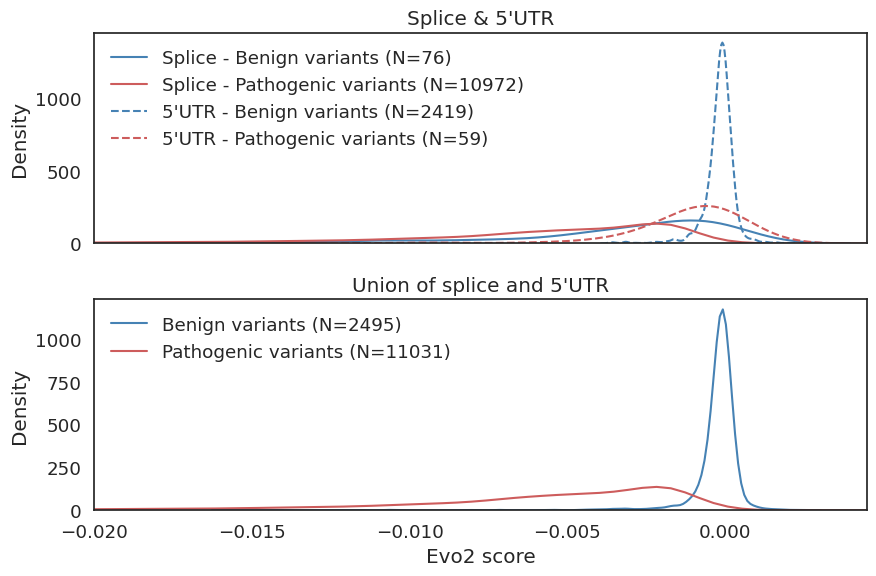

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import QuantileTransformer
import numpy as np

sns.set(style="white", font_scale=1.2)

df = pd.read_csv("/gpfs/home/pl2948/VariantInterpretation/Data/all_scores_final.csv")

def get_group(row):
    if row["group: 5'UTR"] == 1:
        return "5'UTR"
    elif row["group: splice"] == 1:
        return "Splice"
    else:
        return "Other"

df["group"] = df.apply(get_group, axis=1)
df = df[df["group"].isin(["5'UTR", "Splice"])]

df["label_str"] = df["ClinVar_label"].map({0: "Benign variants", 1: "Pathogenic variants"})

df_combined = df.copy()
df_combined["group_plot"] = df["group"]
df_add = df.copy()
df_add["group_plot"] = "Union of splice and 5'UTR"
df_all = pd.concat([df_combined, df_add], axis=0)

fig, axes = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

palette = {
    "Benign variants": "steelblue",
    "Pathogenic variants": "indianred"
}
linestyles = {
    "Splice": "-",
    "5'UTR": "--"
}

ax = axes[0]
for group in ["Splice", "5'UTR"]:
    for label in ["Benign variants", "Pathogenic variants"]:
        subset = df[(df["group"] == group) & (df["label_str"] == label)]
        if len(subset) > 1:
            sns.kdeplot(
                data=subset,
                x="evo2",
                fill=False, 
                ax=ax,
                label=f"{group} - {label} (N={len(subset)})",
                color=palette[label],
                linestyle=linestyles[group],
                bw_adjust=0.8,
                common_norm=False
            )

ax.set_title("Splice & 5'UTR")
ax.set_ylabel("Density")
ax.set_xlabel("")
ax.legend(loc="upper left", frameon=False)

ax = axes[1]
for label in ["Benign variants", "Pathogenic variants"]:
    subset = df_all[(df_all["group_plot"] == "Union of splice and 5'UTR") & (df_all["label_str"] == label)]
    if len(subset) > 1:
        sns.kdeplot(
            data=subset,
            x="evo2",
            fill=False,  # 不填充
            ax=ax,
            label=f"{label} (N={len(subset)})",
            color=palette[label],
            bw_adjust=0.8
        )

ax.set_title("Union of splice and 5'UTR")
ax.set_ylabel("Density")
ax.set_xlabel("Evo2 score")
ax.legend(loc="upper left", frameon=False)

for ax in axes:
    ax.set_xlim(-0.02, 0.0045)
plt.tight_layout()
plt.savefig("curve_v1.svg", format="svg", bbox_inches="tight")
plt.show()

# Different Integration of AlphaGenome

In [30]:
df = pd.read_csv("/gpfs/home/pl2948/VariantInterpretation/Data/ag_splice.csv")
df

,#CHROM,POS,ID,REF,ALT,INFO,ClinVar_gold_stars,ClinVarName_refseq_ids,ClinVarName_AAPOS,ClinVarName_AAREF,...,SPLICE_SITE_USAGE_quantile_abs,SPLICE_SITE_USAGE_raw_abs,Polyadenylation_quantile_abs,Polyadenylation_raw_abs,SpliceJunction_quantile_abs,SpliceJunction_raw_abs,composite_quantile_score,origin,splice_head_composite_quantile_score,aggregate_splice
0,chr2,19989284,20,T,C,1.0,NaN,NM_020779.4,NaN,NaN,...,0.999990,0.945228,0.986499,0.034447,0.99999,4.335938,0.99999,SPLICE_SITES_quantile_abs,0.99999,2.804543
1,chr2,63492941,45,C,A,1.0,NaN,NM_015910.7,NaN,NaN,...,0.999990,0.929585,0.972161,0.016160,0.99999,5.484375,0.99999,SPLICE_SITES_quantile_abs,0.99999,3.018601
2,chr1,45014071,67,G,C,1.0,2.0,NM_000374.5,NaN,NaN,...,0.999990,0.972605,0.881557,0.007508,0.99999,8.968750,0.99999,SPLICE_SITES_quantile_abs,0.99999,3.761583
3,chr10,89222510,81,C,T,1.0,1.0,NM_000235.4,NaN,NaN,...,0.999990,0.984290,0.991829,0.040822,0.99999,8.367188,0.99999,SPLICE_SITES_quantile_abs,0.99999,3.657449
4,chr22,30613044,98,T,G,1.0,NaN,NM_000355.4,NaN,NaN,...,0.999990,0.941396,0.975119,0.024260,0.99999,6.863281,0.99999,SPLICE_SITES_quantile_abs,0.99999,3.310089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11043,chr2,227253338,3894556,G,A,1.0,1.0,NM_000091.5,NaN,NaN,...,0.999978,0.776489,NaN,NaN,0.99999,5.531250,0.99999,SpliceJunction_quantile_abs,0.99999,2.866979
11044,chr11,61786062,3894587,G,A,1.0,NaN,NM_001127392.3,NaN,NaN,...,0.999990,0.925377,0.996737,0.066342,0.99999,4.300781,0.99999,SPLICE_SITES_quantile_abs,0.99999,2.779659
11045,chr2,165313901,3895530,G,A,1.0,1.0,NM_001040142.2,NaN,NaN,...,0.999990,0.813522,0.984525,0.031709,0.99992,2.082031,0.99999,SPLICE_SITE_USAGE_quantile_abs,0.99999,2.185495
11046,chr3,41233339,3895539,A,G,1.0,1.0,NM_001904.4,NaN,NaN,...,0.999990,0.992039,0.999199,0.112777,0.99999,13.140625,0.99999,SPLICE_SITES_quantile_abs,0.99999,4.618027


In [31]:
cols = [
    'SPLICE_SITES_quantile_abs', 'SPLICE_SITES_raw_abs',
    'SPLICE_SITE_USAGE_quantile_abs', 'SPLICE_SITE_USAGE_raw_abs',
    'SpliceJunction_quantile_abs', 'SpliceJunction_raw_abs',
    'composite_quantile_score', 'origin',
    'splice_head_composite_quantile_score', 'aggregate_splice'
]

na_counts = df[cols].isna().sum()
print(na_counts)

SPLICE_SITES_quantile_abs               0
SPLICE_SITES_raw_abs                    0
SPLICE_SITE_USAGE_quantile_abs          0
SPLICE_SITE_USAGE_raw_abs               0
SpliceJunction_quantile_abs             1
SpliceJunction_raw_abs                  1
composite_quantile_score                0
origin                                  0
splice_head_composite_quantile_score    0
aggregate_splice                        1
dtype: int64


In [33]:
cols = [
    'SPLICE_SITES_quantile_abs', 'SPLICE_SITES_raw_abs',
    'SPLICE_SITE_USAGE_quantile_abs', 'SPLICE_SITE_USAGE_raw_abs',
    'SpliceJunction_quantile_abs', 'SpliceJunction_raw_abs',
    'composite_quantile_score', 
    'splice_head_composite_quantile_score', 
    'aggregate_splice'
]

df_filtered = df.dropna(subset=cols)
df_filtered

,#CHROM,POS,ID,REF,ALT,INFO,ClinVar_gold_stars,ClinVarName_refseq_ids,ClinVarName_AAPOS,ClinVarName_AAREF,...,SPLICE_SITE_USAGE_quantile_abs,SPLICE_SITE_USAGE_raw_abs,Polyadenylation_quantile_abs,Polyadenylation_raw_abs,SpliceJunction_quantile_abs,SpliceJunction_raw_abs,composite_quantile_score,origin,splice_head_composite_quantile_score,aggregate_splice
0,chr2,19989284,20,T,C,1.0,NaN,NM_020779.4,NaN,NaN,...,0.999990,0.945228,0.986499,0.034447,0.99999,4.335938,0.99999,SPLICE_SITES_quantile_abs,0.99999,2.804543
1,chr2,63492941,45,C,A,1.0,NaN,NM_015910.7,NaN,NaN,...,0.999990,0.929585,0.972161,0.016160,0.99999,5.484375,0.99999,SPLICE_SITES_quantile_abs,0.99999,3.018601
2,chr1,45014071,67,G,C,1.0,2.0,NM_000374.5,NaN,NaN,...,0.999990,0.972605,0.881557,0.007508,0.99999,8.968750,0.99999,SPLICE_SITES_quantile_abs,0.99999,3.761583
3,chr10,89222510,81,C,T,1.0,1.0,NM_000235.4,NaN,NaN,...,0.999990,0.984290,0.991829,0.040822,0.99999,8.367188,0.99999,SPLICE_SITES_quantile_abs,0.99999,3.657449
4,chr22,30613044,98,T,G,1.0,NaN,NM_000355.4,NaN,NaN,...,0.999990,0.941396,0.975119,0.024260,0.99999,6.863281,0.99999,SPLICE_SITES_quantile_abs,0.99999,3.310089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11043,chr2,227253338,3894556,G,A,1.0,1.0,NM_000091.5,NaN,NaN,...,0.999978,0.776489,NaN,NaN,0.99999,5.531250,0.99999,SpliceJunction_quantile_abs,0.99999,2.866979
11044,chr11,61786062,3894587,G,A,1.0,NaN,NM_001127392.3,NaN,NaN,...,0.999990,0.925377,0.996737,0.066342,0.99999,4.300781,0.99999,SPLICE_SITES_quantile_abs,0.99999,2.779659
11045,chr2,165313901,3895530,G,A,1.0,1.0,NM_001040142.2,NaN,NaN,...,0.999990,0.813522,0.984525,0.031709,0.99992,2.082031,0.99999,SPLICE_SITE_USAGE_quantile_abs,0.99999,2.185495
11046,chr3,41233339,3895539,A,G,1.0,1.0,NM_001904.4,NaN,NaN,...,0.999990,0.992039,0.999199,0.112777,0.99999,13.140625,0.99999,SPLICE_SITES_quantile_abs,0.99999,4.618027


In [ ]:
df_filtered.ClinVar_label.sum()

10972.0

In [ ]:
from sklearn.metrics import roc_auc_score
import pandas as pd

auroc_results = {}
for col in cols:
    score = roc_auc_score(df_filtered["ClinVar_label"], df_filtered[col])
    auroc_results[col] = score

auroc_df = pd.DataFrame.from_dict(auroc_results, orient="index", columns=["AUC"])
auroc_df = auroc_df.sort_values("AUC", ascending=False)
display(auroc_df)

,AUC
SPLICE_SITE_USAGE_raw_abs,0.778773
aggregate_splice,0.707689
SPLICE_SITES_raw_abs,0.705824
SPLICE_SITE_USAGE_quantile_abs,0.699385
SPLICE_SITES_quantile_abs,0.682842
SpliceJunction_raw_abs,0.668606
composite_quantile_score,0.614363
splice_head_composite_quantile_score,0.613838
SpliceJunction_quantile_abs,0.600275


SpliceJunction_quantile_abs
SpliceJunction_raw_abs
SPLICE_SITES_quantile_abs
SPLICE_SITES_raw_abs
SPLICE_SITE_USAGE_quantile_abs
SPLICE_SITE_USAGE_raw_abs
splice_head_composite_quantile_score
aggregate_splice
composite_quantile_score


/tmp/ipykernel_1384936/2930757566.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=FONT_NAME)


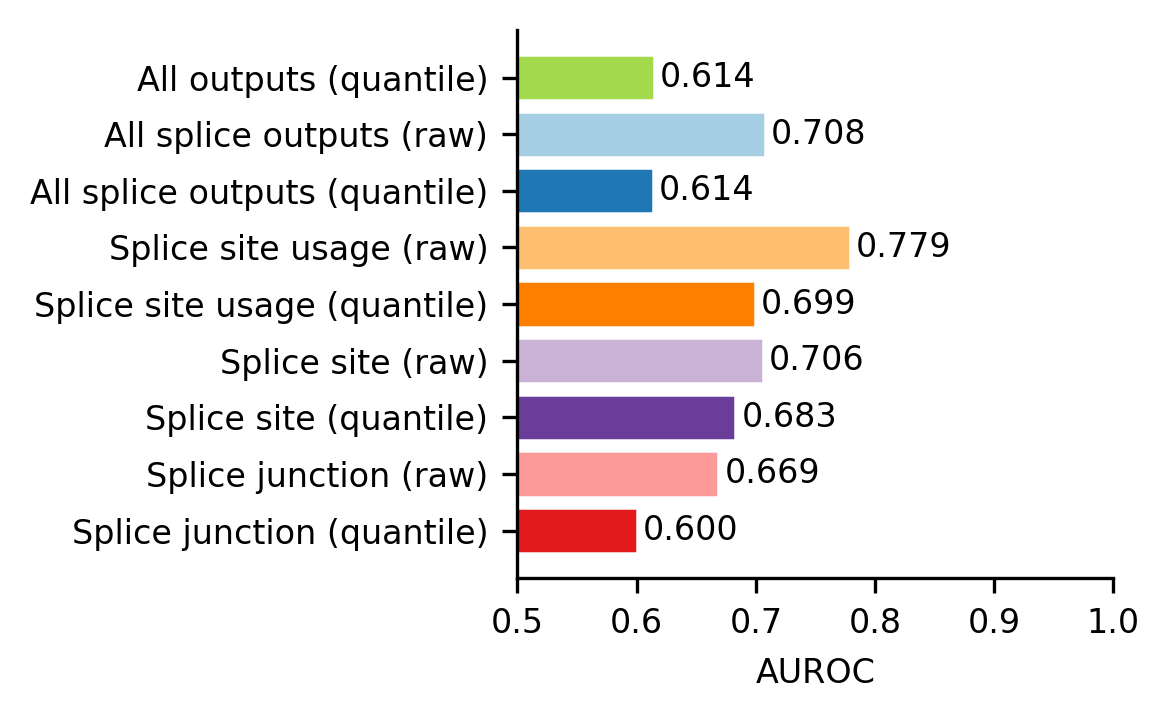

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# === Style ===
FONT_SIZE = 8
# === Mapping ===
name_map = {
    'composite_quantile_score': 'All outputs (quantile)',
    'aggregate_splice': 'All splice outputs (raw)',
    'splice_head_composite_quantile_score': 'All splice outputs (quantile)',
    'SPLICE_SITE_USAGE_raw_abs': 'Splice site usage (raw)',
    'SPLICE_SITE_USAGE_quantile_abs': 'Splice site usage (quantile)',
    'SPLICE_SITES_raw_abs': 'Splice site (raw)',
    'SPLICE_SITES_quantile_abs': 'Splice site (quantile)',
    'SpliceJunction_raw_abs': 'Splice junction (raw)',
    'SpliceJunction_quantile_abs': 'Splice junction (quantile)'
}

# 颜色
palette = {
    'All outputs (quantile)': "#a2d94d", 
    'All splice outputs (raw)': "#1f77b4",
    'All splice outputs (quantile)': "#ff7f0e",
    'Splice site usage (raw)': "#2ca02c", 
    'Splice site usage (quantile)': "#d62728",
    'Splice site (raw)': "#9467bd", 
    'Splice site (quantile)': "#8c564b",
    'Splice junction (raw)': "#e377c2", 
    'Splice junction (quantile)': "#17becf"  
}

palette = {
    'All outputs (quantile)': "#a2d94d",

    'All splice outputs (raw)': "#a6cee3",
    'All splice outputs (quantile)': "#1f78b4",

    'Splice site usage (raw)': "#fdbf6f",
    'Splice site usage (quantile)': "#ff7f00",

    'Splice site (raw)': "#cab2d6",
    'Splice site (quantile)': "#6a3d9a",

    'Splice junction (raw)': "#fb9a99",
    'Splice junction (quantile)': "#e31a1c"
}

fig, ax = plt.subplots(figsize=(4, 2.5), dpi=300)
for colname in list(name_map.keys())[::-1]:
    print(colname)
    label = name_map[colname]
    auc = auroc_df.loc[colname,"AUC"]
    color = palette.get(label, "#666666")

    ax.barh(
        y=label,
        width=auc,
        color=color,
        edgecolor='white',
        linewidth=0.6
    )
    ax.text(
        x=max(auc + 0.005, 0.505),
        y=label,
        s=f"{auc:.3f}",
        va='center', ha='left',
        fontsize=FONT_SIZE, fontname=FONT_NAME
    )

ax.set_xlabel("AUROC", fontsize=FONT_SIZE, fontname=FONT_NAME)
ax.set_xlim(0.5, 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=FONT_SIZE)
ax.set_yticklabels(ax.get_yticklabels(), fontname=FONT_NAME)

plt.tight_layout()
# 保存为 SVG
plt.savefig("splice_v1.svg", format="svg", bbox_inches="tight")
plt.show()